In [2]:
import glob
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications.vgg16 import VGG16
#from cv2 import imshow
#from google.colab.patches import cv2_imshow

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

2023-06-04 17:54:51.469195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 17:54:51.722499: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-04 17:54:51.722535: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-04 17:54:52.886772: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Visualize data distribution - A

In [4]:
root_dir = '/home/haohao/Desktop/Hieu/VisualPhish/'
dataset_dir_benign = root_dir + 'benign_test'
dataset_dir_phishing = root_dir + 'phishing'
dataset_dir_trusted = root_dir + 'trusted_list'
benign = list(glob.glob(dataset_dir_benign + '/*'))
print('Number of benign images: ' + str(len(benign)))
phishing = list(glob.glob(dataset_dir_phishing + '/**/*'))
print('Number of phishing images: ' + str(len(phishing)))
trusted_list = list(glob.glob(dataset_dir_trusted + '/**/*'))
print('Number of trusted images: ' + str(len(trusted_list)))

# Count pnp file (crashed with image_ds_from_dr) in trusted list
cntPnp = 0
for f in trusted_list:
    if f.upper().find('.PNP') != -1:
        cntPnp += 1
print('Num of PnP: ', cntPnp)
print(trusted_list[:10])
len(trusted_list)

Number of benign images: 3107
Number of phishing images: 1195
Number of trusted images: 1927
Num of PnP:  0
['/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_0.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_46.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_33.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_27.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_14.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_40.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_15.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_52.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_17.png', '/home/haohao/Desktop/Hieu/VisualPhish/trusted_list/docmagic/T52_31.png']


1927

# Visualize data distribution - B - Subfolders

Number of subfolders: 155
/home/haohao/Desktop/Hieu/VisualPhish/phishing/paypal
/home/haohao/Desktop/Hieu/VisualPhish/phishing/facebook


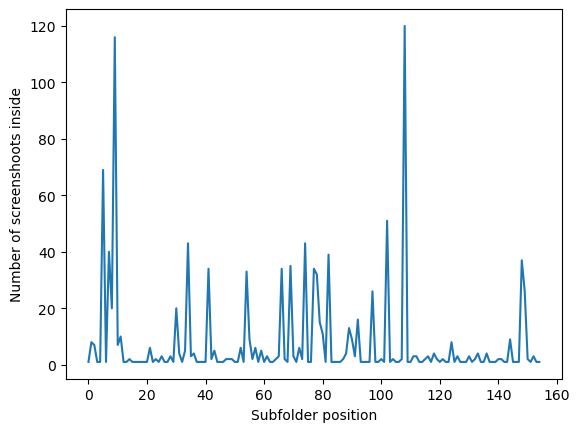

In [5]:
phishing_subfolders = list(glob.glob(dataset_dir_phishing + '/*'))

for x in phishing_subfolders:
  tmp = re.search('.*targets2\.txt$', x)
  if tmp:
    phishing_subfolders.remove(tmp.group(0))
    break

print('Number of subfolders: ' + str(len(phishing_subfolders)))

subfolder_size = []
for folder in phishing_subfolders:
  subfolder_size.append(len(list(glob.glob(folder + '/*'))))
  if len(list(glob.glob(folder + '/*'))) > 100:
    print(folder)
plt.plot(np.array(subfolder_size))
plt.xlabel('Subfolder position')
plt.ylabel('Number of screenshoots inside')
plt.show()

Number of subfolders: 156


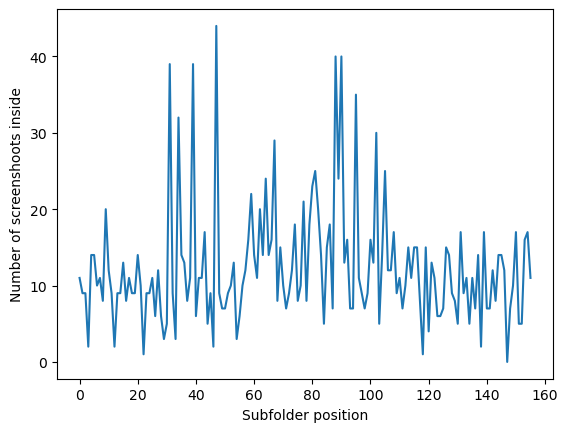

In [6]:
trusted_list_subfolders = list(glob.glob(dataset_dir_trusted + '/*'))

for x in trusted_list_subfolders:
  tmp = re.search('.*targets2\.txt$', x)
  if tmp:
    trusted_list_subfolders.remove(tmp.group(0))
    break

print('Number of subfolders: ' + str(len(trusted_list_subfolders)))

subfolder_size = []
for folder in trusted_list_subfolders:
  subfolder_size.append(len(list(glob.glob(folder + '/*'))))
  if len(list(glob.glob(folder + '/*'))) > 100:
    print(folder)
plt.plot(np.array(subfolder_size))
plt.xlabel('Subfolder position')
plt.ylabel('Number of screenshoots inside')
plt.show()

# Visualize data distribution - B

In [7]:
trusted_list_subfolders = list(glob.glob(dataset_dir_trusted + '/*'))

for x in trusted_list_subfolders:
  tmp = re.search('.*targets2\.txt$', x)
  if tmp:
    trusted_list_subfolders.remove(tmp.group(0))
    break

files = []
for folder in trusted_list_subfolders:
  files.append(list(glob.glob(folder + '/*')))
  

In [8]:
cnt = 0

print('Crashed files:')

for f in files:
    for x in f:
        tmp = x
        tmp = tmp.upper()
        if tmp.find('.PNG') == -1 and tmp.find('.JPG') == -1:
            print(tmp, end = ': ')
            if os.path.isfile(x):
                os.remove(x)
                print('removed')
            else:
                print()
        else:
            cnt += 1
print(cnt)

Crashed files:
1927


# Data balancing

In [9]:
saved_dir = 'unused_trusted_list'
saved_path = os.path.join(root_dir, saved_dir)
if not os.path.exists(saved_path):
    os.mkdir(saved_path)

In [10]:
trusted_list_subfolders = list(glob.glob(dataset_dir_trusted + '/*'))

for x in trusted_list_subfolders:
  tmp = re.search('.*targets2\.txt$', x)
  if tmp:
    trusted_list_subfolders.remove(tmp.group(0))
    break

files = []
for folder in trusted_list_subfolders:
  files.append(list(glob.glob(folder + '/*')))
  

### Move images

In [44]:
movingRatio = 0.8

for f in files:
    numOfMovedFiles = math.floor(movingRatio * len(f))
    for x in f[:numOfMovedFiles]:
        os.rename(x, saved_path + '/' + x.replace('/', '----------'))

### Move back

In [40]:
files = list(glob.glob(os.path.join(root_dir, saved_dir) + '/*'))

for f in files:
    originalFilename = f.replace(os.path.join(root_dir, saved_dir) + '/', '').replace('----------', '/')
    os.rename(f, originalFilename)
  

# Load dataset

In [11]:
img_height = 256
img_width = 256
phishing_size = 1195
trusted_size = 1927

In [12]:
# We can use trusted_list as a phishing dataset

dataseta_train = tf.keras.preprocessing.image_dataset_from_directory(dataset_dir_phishing, validation_split=0.3, subset='training', seed=123, image_size=(img_height, img_width), batch_size=None, labels=[1 for i in range(phishing_size)], label_mode='int')
datasetb_train = tf.keras.preprocessing.image_dataset_from_directory(dataset_dir_benign, validation_split=0.3, subset='training', seed=123, image_size=(img_height, img_width), batch_size=None, labels=None)
datasetc_train = tf.keras.preprocessing.image_dataset_from_directory(dataset_dir_trusted, validation_split=0.3, subset='training', seed=123, image_size=(img_height, img_width), batch_size=None, labels=[1 for i in range(trusted_size)], label_mode='int')

dataseta_train = dataseta_train.map(lambda x, y: (x, tf.cast(y, tf.float32)))
datasetb_train = datasetb_train.map(lambda x: (x, tf.constant(0.0)))
datasetc_train = datasetc_train.map(lambda x, y: (x, tf.cast(y, tf.float32)))

dataseta_test = tf.keras.preprocessing.image_dataset_from_directory(dataset_dir_phishing, validation_split=0.3, subset='validation', seed=123, image_size=(img_height, img_width), batch_size=None, labels=[1 for i in range(phishing_size)], label_mode='int')
datasetb_test = tf.keras.preprocessing.image_dataset_from_directory(dataset_dir_benign, validation_split=0.3, subset='validation', seed=123, image_size=(img_height, img_width), batch_size=None, labels=None)
datasetc_test = tf.keras.preprocessing.image_dataset_from_directory(dataset_dir_trusted, validation_split=0.3, subset='validation', seed=123, image_size=(img_height, img_width), batch_size=None, labels=[1 for i in range(trusted_size)], label_mode='int')

dataseta_test = dataseta_test.map(lambda x, y: (x, tf.cast(y, tf.float32)))
datasetb_test = datasetb_test.map(lambda x: (x, tf.constant(0.0)))
datasetc_test = datasetc_test.map(lambda x, y: (x, tf.cast(y, tf.float32)))

Found 1195 files belonging to 155 classes.
Using 837 files for training.


2023-06-04 17:55:52.665340: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-04 17:55:52.665394: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-04 17:55:52.665439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (haohao-virtual-machine): /proc/driver/nvidia/version does not exist
2023-06-04 17:55:52.665853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 3107 files belonging to 1 classes.
Using 2175 files for training.
Found 1927 files belonging to 155 classes.
Using 1349 files for training.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Found 1195 files belonging to 155 classes.
Using 358 files for validation.
Found 3107 files belonging to 1 classes.
Using 932 files for validation.
Found 1927 files belonging to 155 classes.
Using 578 files for validation.


In [13]:
train_ds = dataseta_train.concatenate(datasetb_train).concatenate(datasetc_train)
test_ds = dataseta_test.concatenate(datasetb_test).concatenate(datasetc_test)

# Data visualization and normalization

In [ ]:
for img, label in train_ds.take(10):
  cv2_imshow(np.array(img))

In [14]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [15]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Create and train model

In [16]:
def create_model(input_shape, optimizer='rmsprop', fine_tune=0):
  conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
  if fine_tune > 0:
      for layer in conv_base.layers[:-fine_tune]:
          layer.trainable = False
  else:
      for layer in conv_base.layers:
          layer.trainable = False

  top_model = conv_base.output

  top_model = Flatten(name="flatten")(top_model)
  top_model = Dense(4096, activation='relu')(top_model)
  top_model = Dense(1072, activation='relu')(top_model)
  top_model = Dropout(0.2)(top_model)
  output_layer = Dense(1, activation='sigmoid')(top_model)
  
  model = Model(inputs=conv_base.input, outputs=output_layer)

  model.compile(optimizer=optimizer, 
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model


In [17]:
train_ds = train_ds.shuffle(4363).take(4363).batch(32)
test_ds = test_ds.batch(32)

In [18]:
input_shape = (img_height, img_width, 3)
optim_1 = Adam(learning_rate=0.001)
n_epochs = 100


In [66]:
vgg_model = create_model(input_shape, optim_1, fine_tune=0)
vgg_history = vgg_model.fit(train_ds,
                            batch_size=None,
                            epochs=n_epochs,
                            validation_data=test_ds,
                            verbose=1)

2023-06-04 17:44:59.010349: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:44:59.557769: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:44:59.754333: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.


Epoch 1/100


2023-06-04 17:45:00.878114: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:45:01.075623: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:45:18.918624: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 548 of 1024
2023-06-04 17:45:26.752938: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2023-06-04 17:45:26.785217: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 838 of 4363
2023-06-04 17:45:26.786294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 839 of 4363


In [12]:
vgg_model.save(root_dir + '100epoch32bs.h5')

# Evaluation

In [19]:
vgg_model = keras.models.load_model(root_dir + '100epoch32bs.h5')

2023-06-04 17:56:20.161204: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:56:20.691721: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:56:20.905810: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:56:25.099658: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2023-06-04 17:56:26.068004: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.


In [20]:
predictions = []
y_true = []
for x, y in test_ds:
  predictions.append(vgg_model.predict(x))
  y_true.append(y)


1/1 [==============================] - 8s 8s/step


2023-06-04 17:58:05.898331: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 384 of 1024


1/1 [==============================] - 14s 14s/step


2023-06-04 17:58:15.942421: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 768 of 1024
2023-06-04 17:58:20.959817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


1/1 [==============================] - 7s 7s/step


2023-06-04 18:02:17.524293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 323 of 1024


1/1 [==============================] - 12s 12s/step


2023-06-04 18:02:25.500548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


1/1 [==============================] - 3s 3s/step


In [21]:
print(predictions[:10])
print(y_true[:10])
print(len(predictions))
print(len(y_true))

[array([[1.        ],
       [0.9567516 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.999998  ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999774],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9991383 ],
       [0.99960583],
       [0.0093989 ],
       [1.        ],
       [0.9999999 ]], dtype=float32), array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9996138e-01],
       [8.6176920e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.6714111e-06],
       [9.9999416e-01],
       [9.9996257e-01]

In [22]:
iter = 59 # ceil(samples/batch_size)
y_pred = []
for i in range(iter):
  for p in predictions[i]:
    if p[0] >= 0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)

In [23]:
y = []

for tensor in y_true:
  for v in tensor:
    if (v == 0):
      y.append(0)
    else:
      y.append(1)

In [24]:
def evaluation(y_test, y_pred):
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred)
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred)
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred)
  print("F1:",result5)
  result6 = roc_auc_score(y_test, y_pred)
  print("AUC:",result6)
  result7 = confusion_matrix(y_test, y_pred)
  print("Confusion matrix: \n", result7)

In [25]:
evaluation(y, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       932
           1       0.84      0.91      0.87       936

    accuracy                           0.87      1868
   macro avg       0.87      0.87      0.87      1868
weighted avg       0.87      0.87      0.87      1868

Accuracy: 0.8661670235546038
Precision: 0.8382642998027613
Recall: 0.9081196581196581
F1: 0.8717948717948717
AUC: 0.8660769964418032
Confusion matrix: 
 [[768 164]
 [ 86 850]]


In [26]:
print(y.count(0))
print(y.count(1))
print(y_pred.count(0))
print(y_pred.count(1))

932
936
854
1014


In [ ]:
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()